In [1]:
# Importing libraries
import copy
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import locale

from optimization import optimize_basic_cycle, optimize_two_evaporators_cycle

In [2]:
# Setting locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR")
plt.rcParams['axes.formatter.use_locale'] = True

     iteration        cop
0          0.0  11.422059
1          1.0  11.461255
2          2.0  11.500319
3          3.0  11.539254
4          4.0  11.578060
..         ...        ...
104      104.0  11.903205
105      105.0  11.903667
106      106.0  11.904129
107      107.0  11.904593
108      108.0  11.904724

[109 rows x 2 columns]


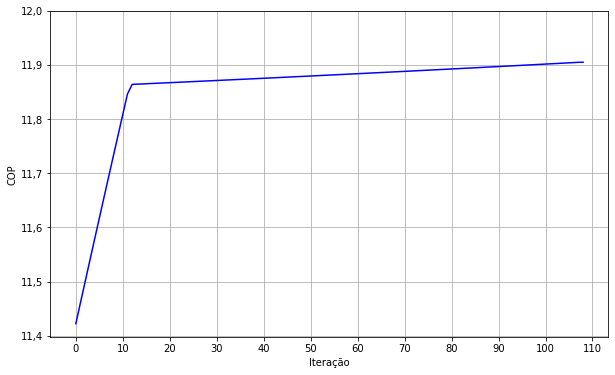

In [3]:
input_values = {
    't_internal_env': 21 + 273.15,
    't_external_env': 28 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator': 5,
    'q_evaporator': 9000 * 0.293071,
    'isentropic_efficiency': 0.7,
    'subcooling': 5,
    'superheating': 5,
    'upper_threshold': 10,
    'lower_threshold': 0,
    'refrigerant': 'R600a'
}

interation_log = optimize_basic_cycle(input_values, 'cop')
print(interation_log)

fig, ax = plt.subplots(figsize=(10, 6))
interation_log.plot(
    x='iteration', 
    y='cop', 
    kind='line',
    color='blue',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Iteração')
ax.set_xticks([x * 10 for x in range(0, 12)])
ax.set_yticks([11 + (x * 0.1) for x in range(4, 11)])
ax.get_legend().remove()
ax.grid(True)

plt.savefig('images/iteration_log_basic_cycle.png')

     iteration       cop
0          0.0  2.569431
1          1.0  2.572024
2          2.0  2.574614
3          3.0  2.577202
4          4.0  2.579787
..         ...       ...
649      649.0  2.697916
650      650.0  2.697928
651      651.0  2.697940
652      652.0  2.697952
653      653.0  2.697953

[654 rows x 2 columns]


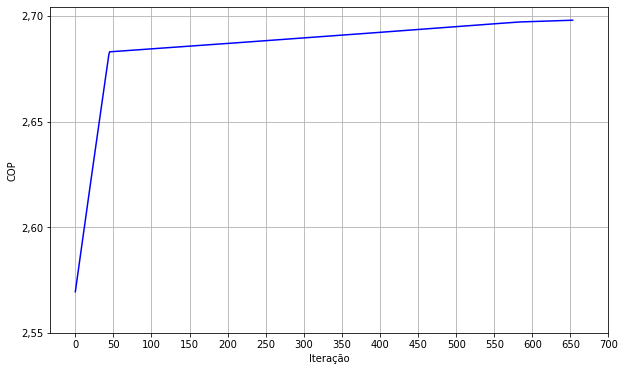

In [4]:
input_values = {
    't_internal_env_ht': 3 + 273.15,
    't_internal_env_lt': -18 + 273.15,
    't_external_env': 28 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator_ht': 5,
    'approach_evaporator_lt': 5,
    'q_evaporator_ht': 75,
    'q_evaporator_lt': 75,
    'f': 0.5,
    'isentropic_efficiency': 0.7,
    'subcooling': 5,
    'superheating_ht': 5,
    'superheating_lt': 5,
    'upper_threshold': 10,
    'lower_threshold': 0,
    'refrigerant': 'R600a'
}

interation_log = optimize_two_evaporators_cycle(input_values, 'cop')
interation_log.drop(interation_log.tail(1).index,inplace=True)
print(interation_log)

fig, ax = plt.subplots(figsize=(10, 6))
interation_log.plot(
    x='iteration', 
    y='cop', 
    kind='line',
    color='blue',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Iteração')
ax.set_xticks([x * 50 for x in range(0, 15)])
ax.set_yticks([2 + (x * 0.05) for x in range(11, 15)])
ax.get_legend().remove()
ax.grid(True)

plt.savefig('images/iteration_log_two_evaporators_cycle.png')